# Ejercicio 3: Previsi√≥n de Falla - Resumen Completo

## Introducci√≥n

Este notebook presenta un resumen completo del an√°lisis realizado para el **Ejercicio 3: Previsi√≥n de Falla** del desaf√≠o de Data Science de Mercado Libre. El objetivo principal es desarrollar un sistema de mantenimiento predictivo para dispositivos en galpones de Full, utilizando t√©cnicas de machine learning para predecir fallas antes de que ocurran.

### Contexto del Problema
- Los galpones de Full de Mercado Libre cuentan con una flota de dispositivos que transmiten diariamente telemetr√≠a agregada
- Las t√©cnicas de mantenimiento predictivo est√°n dise√±adas para determinar la condici√≥n del equipo y predecir cu√°ndo se debe realizar el mantenimiento
- Este enfoque promete ahorros de costos sobre el mantenimiento preventivo de rutina

### Estructura del An√°lisis
1. **An√°lisis Exploratorio de Datos (EDA)**
2. **Feature Engineering**
3. **Construcci√≥n y Evaluaci√≥n de Modelos**
4. **Resultados y Conclusiones**

In [1]:
# Configuraci√≥n y librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuraci√≥n de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. An√°lisis Exploratorio de Datos (EDA)

### 1.1 Descripci√≥n del Dataset

In [2]:
# Cargar datos
df_devices = pd.read_csv('../../data/00_raw/full_devices.csv', encoding="latin1")

print("=== INFORMACI√ìN DEL DATASET ===")
print(f"Tama√±o del dataset: {len(df_devices):,} registros")
print(f"Per√≠odo temporal: {df_devices['date'].min()} a {df_devices['date'].max()}")
print(f"Dispositivos √∫nicos: {df_devices['device'].nunique():,}")
print(f"Variables: {len(df_devices.columns)} columnas")
print("\n=== TIPOS DE DATOS ===")
print(df_devices.dtypes.value_counts())
print("\n=== PRIMERAS FILAS ===")
df_devices.head()

=== INFORMACI√ìN DEL DATASET ===
Tama√±o del dataset: 124,494 registros
Per√≠odo temporal: 2015-01-01 a 2015-11-02
Dispositivos √∫nicos: 1,169
Variables: 12 columnas

=== TIPOS DE DATOS ===
int64     10
object     2
Name: count, dtype: int64

=== PRIMERAS FILAS ===


date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0          52           6      407438           0           0           7  
1           0           6      403174           0           0           0  
2           0          12      237394           0           0           0  
3           0           6      410186           0           0           0  
4           0          15      313173           0           0           3

In [3]:
# Verificar valores nulos
print("=== AN√ÅLISIS DE VALORES NULOS ===")
null_counts = df_devices.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "‚úÖ No hay valores nulos")

print("\n=== ESTAD√çSTICAS DESCRIPTIVAS ===")
df_devices.describe()

=== AN√ÅLISIS DE VALORES NULOS ===
‚úÖ No hay valores nulos

=== ESTAD√çSTICAS DESCRIPTIVAS ===


failure    attribute1  attribute2  attribute3  attribute4  \
count 124494.000    124494.000  124494.000  124494.000  124494.000   
mean       0.001 122388103.242     159.485       9.940       1.741   
std        0.029  70459334.216    2179.658     185.747      22.909   
min        0.000         0.000       0.000       0.000       0.000   
25%        0.000  61284762.000       0.000       0.000       0.000   
50%        0.000 122797388.000       0.000       0.000       0.000   
75%        0.000 183309640.000       0.000       0.000       0.000   
max        1.000 244140480.000   64968.000   24929.000    1666.000   

       attribute5  attribute6  attribute7  attribute8  attribute9  
count  124494.000  124494.000  124494.000  124494.000  124494.000  
mean       14.223  260172.658       0.293       0.293      12.452  
std        15.943   99151.079       7.437       7.437     191.426  
min         1.000       8.000       0.000       0.000       0.000  
25%         8.000  221452.000       0.000       0.000       0.000  
50%        10.000  249799.500       0.000       0.000       0.000  
75%        12.000  310266.000       0.000       0.000       0.000  
max        98.000  689161.000     832.000     832.000   18701.000

### 1.2 An√°lisis del Desbalance de Clases

=== AN√ÅLISIS DE FALLAS ===
Total de registros: 124,494
Registros con fallas: 106 (0.085%)
Registros sin fallas: 124,388 (99.915%)
Dispositivos con fallas: 106
Dispositivos totales: 1,169


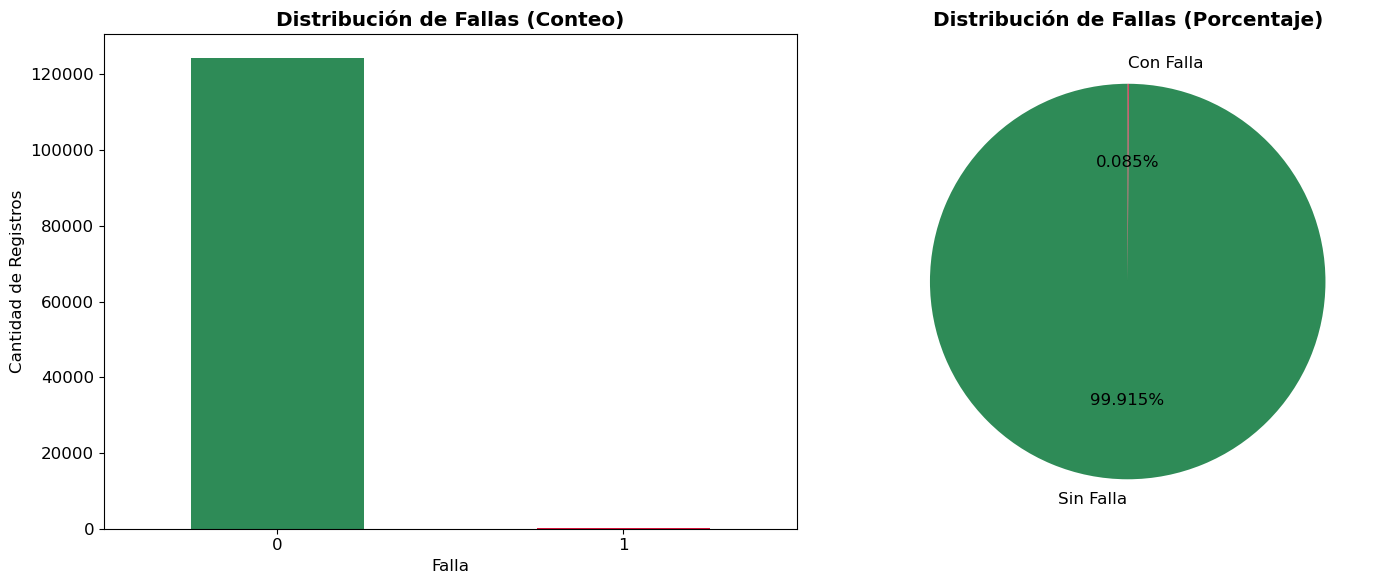

In [4]:
# An√°lisis del desbalance
failure_counts = df_devices['failure'].value_counts()
failure_pct = df_devices['failure'].value_counts(normalize=True) * 100

print("=== AN√ÅLISIS DE FALLAS ===")
print(f"Total de registros: {len(df_devices):,}")
print(f"Registros con fallas: {failure_counts[1]:,} ({failure_pct[1]:.3f}%)")
print(f"Registros sin fallas: {failure_counts[0]:,} ({failure_pct[0]:.3f}%)")
print(f"Dispositivos con fallas: {df_devices[df_devices['failure']==1]['device'].nunique():,}")
print(f"Dispositivos totales: {df_devices['device'].nunique():,}")

# Visualizaci√≥n del desbalance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras
failure_counts.plot(kind='bar', ax=ax1, color=['#2E8B57', '#DC143C'])
ax1.set_title('Distribuci√≥n de Fallas (Conteo)', fontweight='bold')
ax1.set_xlabel('Falla')
ax1.set_ylabel('Cantidad de Registros')
ax1.tick_params(axis='x', rotation=0)

# Gr√°fico de torta
ax2.pie(failure_counts.values, labels=['Sin Falla', 'Con Falla'], 
       autopct='%1.3f%%', colors=['#2E8B57', '#DC143C'], startangle=90)
ax2.set_title('Distribuci√≥n de Fallas (Porcentaje)', fontweight='bold')

plt.tight_layout()
plt.show()

### 1.3 An√°lisis de Correlaciones

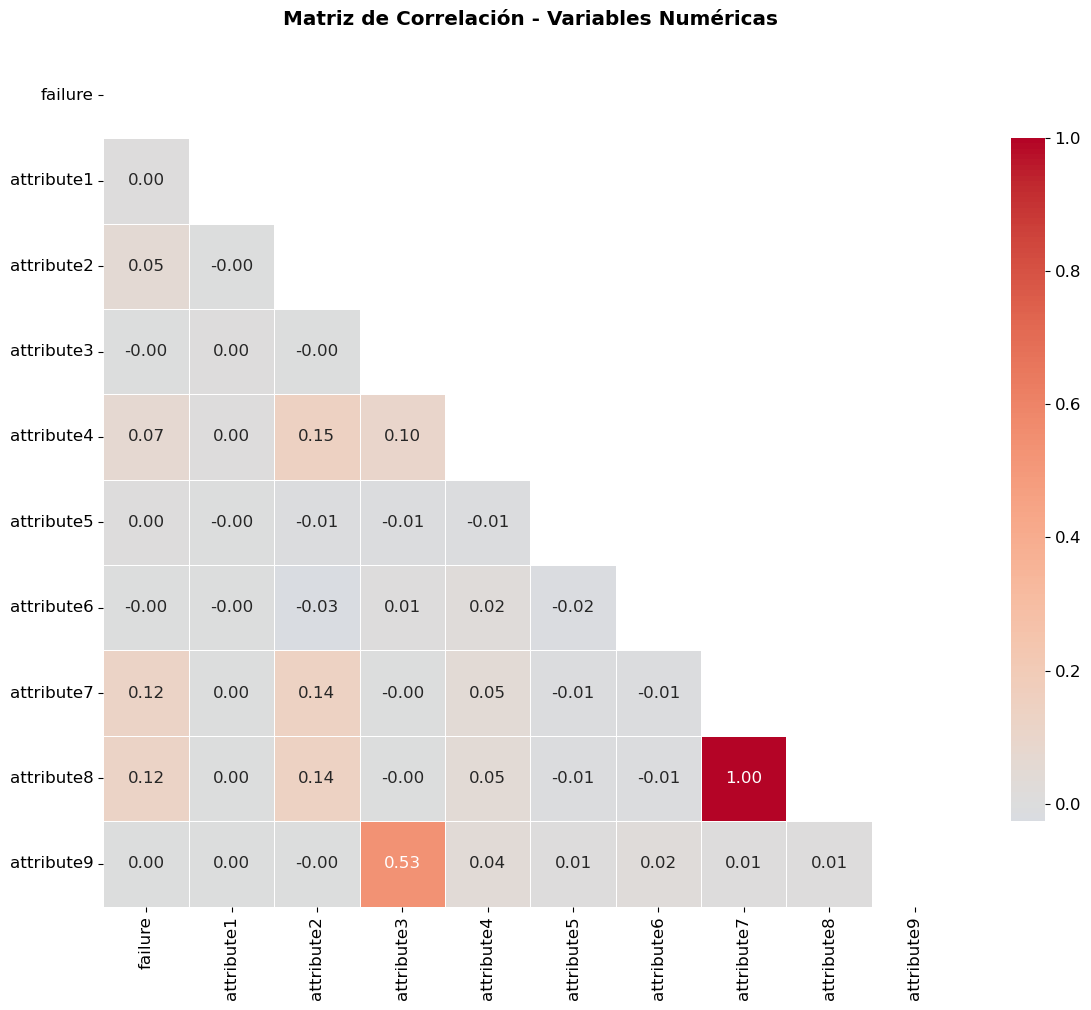

=== CORRELACIONES ALTAS (>0.8) ===
attribute7 - attribute8: 1.000


In [5]:
# Matriz de correlaci√≥n
corr = df_devices.corr(numeric_only=True)

# Crear heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaci√≥n - Variables Num√©ricas', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones altas
print("=== CORRELACIONES ALTAS (>0.8) ===")
high_corr = np.where(np.abs(corr) > 0.8)
high_corr = [(corr.index[x], corr.columns[y], corr.iloc[x, y]) 
            for x, y in zip(*high_corr) if x != y and x < y]
for var1, var2, corr_val in high_corr:
    print(f"{var1} - {var2}: {corr_val:.3f}")

### 1.4 An√°lisis Temporal

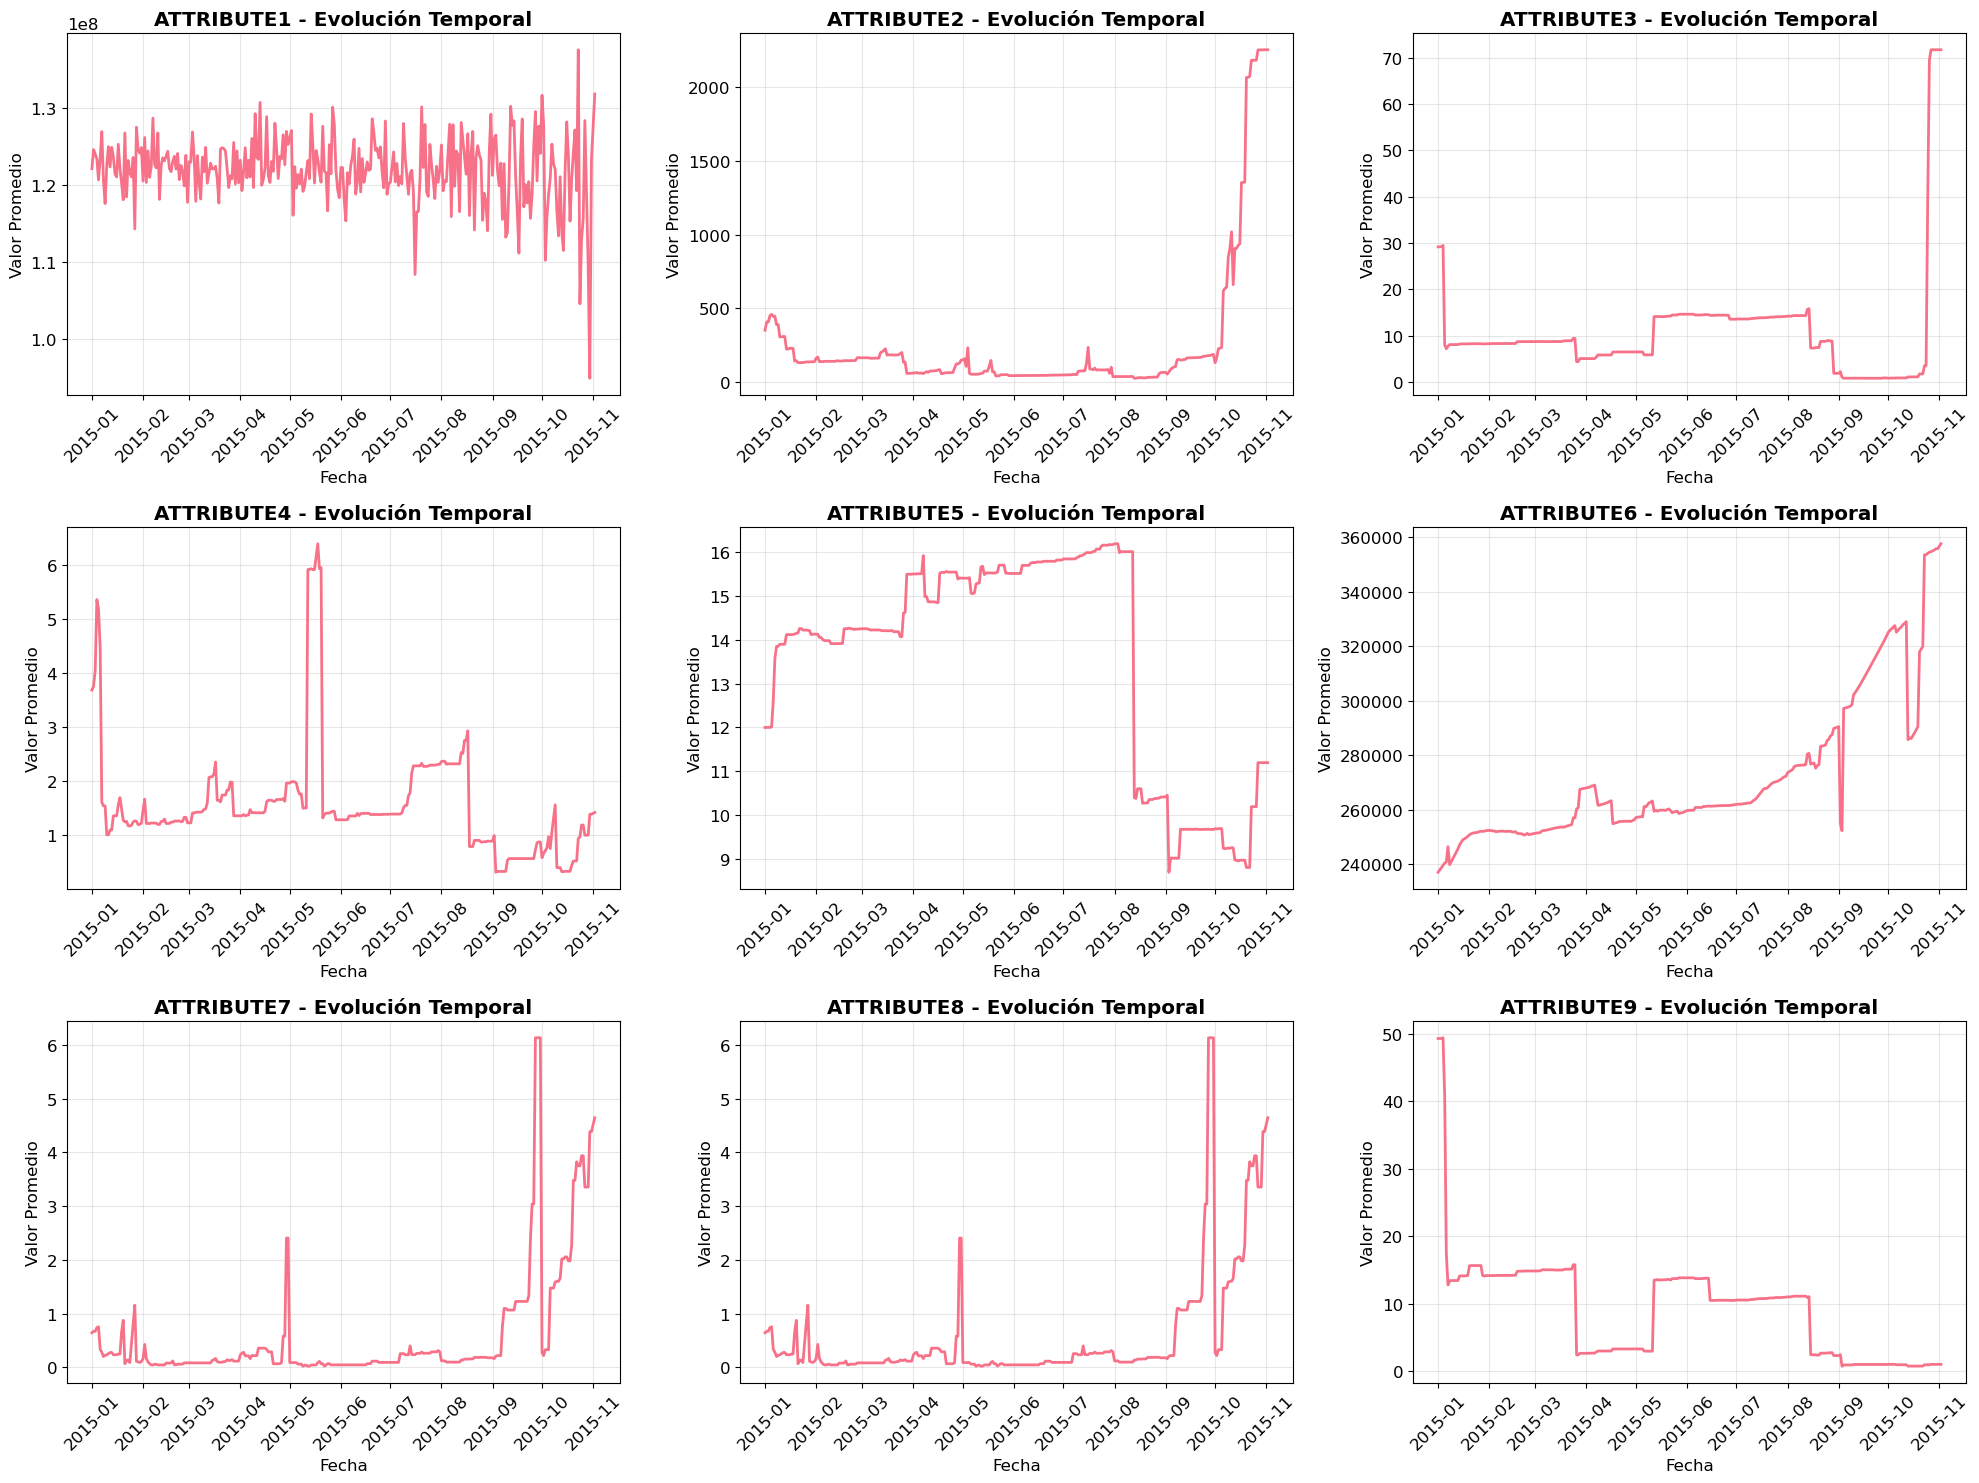

In [6]:
# Convertir fecha a datetime
df_devices['date'] = pd.to_datetime(df_devices['date'])

# An√°lisis temporal por atributo
attributes = [col for col in df_devices.columns if col.startswith('attribute')]

# Crear gr√°ficos temporales
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, attr in enumerate(attributes):
    # Calcular media diaria por atributo
    daily_avg = df_devices.groupby('date')[attr].mean()
    
    axes[i].plot(daily_avg.index, daily_avg.values, linewidth=2)
    axes[i].set_title(f'{attr.upper()} - Evoluci√≥n Temporal', fontweight='bold')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Valor Promedio')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. Feature Engineering

### 2.1 Creaci√≥n de Features Temporales

In [7]:
# Importar la clase de feature engineering
import sys
sys.path.append('../../src')
from feature_engineering import SimpleSensorFE

# Eliminar attribute8 (duplicado de attribute7)
df_devices_clean = df_devices.drop(columns=['attribute8'])

# Aplicar feature engineering
fe_both = SimpleSensorFE(do_diff=True, do_roll_mean=True, roll_windows=[3])
df_both = fe_both.fit_transform(df_devices_clean)

print("=== FEATURE ENGINEERING APLICADO ===")
print(f"Variables originales: {len(df_devices_clean.columns)}")
print(f"Variables despu√©s de FE: {len(df_both.columns)}")
print(f"Nuevas variables creadas: {len(df_both.columns) - len(df_devices_clean.columns)}")

# Mostrar nuevas variables
new_vars = [col for col in df_both.columns if col not in df_devices_clean.columns]
print(f"\nNuevas variables: {new_vars}")

df_both.head()

=== FEATURE ENGINEERING APLICADO ===
Variables originales: 11
Variables despu√©s de FE: 27
Nuevas variables creadas: 16

Nuevas variables: ['attribute1_diff1', 'attribute1_roll_mean3', 'attribute2_diff1', 'attribute2_roll_mean3', 'attribute3_diff1', 'attribute3_roll_mean3', 'attribute4_diff1', 'attribute4_roll_mean3', 'attribute5_diff1', 'attribute5_roll_mean3', 'attribute6_diff1', 'attribute6_roll_mean3', 'attribute7_diff1', 'attribute7_roll_mean3', 'attribute9_diff1', 'attribute9_roll_mean3']


date    device  failure  attribute1  attribute2  attribute3  \
0    2015-01-01  S1F01085        0   215630672          56           0   
1163 2015-01-02  S1F01085        0     1650864          56           0   
2326 2015-01-03  S1F01085        0   124017368          56           0   
3489 2015-01-04  S1F01085        0   128073224          56           0   
4651 2015-01-05  S1F01085        0    97393448          56           0   

      attribute4  attribute5  attribute6  attribute7  attribute9  \
0             52           6      407438           0           7   
1163          52           6      407438           0           7   
2326          52           6      407438           0           7   
3489          52           6      407439           0           7   
4651          52           6      408114           0           7   

      attribute1_diff1  attribute1_roll_mean3  attribute2_diff1  \
0                0.000          215630672.000             0.000   
1163    -213979808.000          215630672.000             0.000   
2326     122366504.000          108640768.000             0.000   
3489       4055856.000          113766301.333             0.000   
4651     -30679776.000           84580485.333             0.000   

      attribute2_roll_mean3  attribute3_diff1  attribute3_roll_mean3  \
0                    56.000             0.000                  0.000   
1163                 56.000             0.000                  0.000   
2326                 56.000             0.000                  0.000   
3489                 56.000             0.000                  0.000   
4651                 56.000             0.000                  0.000   

      attribute4_diff1  attribute4_roll_mean3  attribute5_diff1  \
0                0.000                 52.000             0.000   
1163             0.000                 52.000             0.000   
2326             0.000                 52.000             0.000   
3489             0.000                 52.000             0.000   
4651             0.000                 52.000             0.000   

      attribute5_roll_mean3  attribute6_diff1  attribute6_roll_mean3  \
0                     6.000             0.000             407438.000   
1163                  6.000             0.000             407438.000   
2326                  6.000             0.000             407438.000   
3489                  6.000             1.000             407438.000   
4651                  6.000           675.000             407438.333   

      attribute7_diff1  attribute7_roll_mean3  attribute9_diff1  \
0                0.000                  0.000             0.000   
1163             0.000                  0.000             0.000   
2326             0.000                  0.000             0.000   
3489             0.000                  0.000             0.000   
4651             0.000                  0.000             0.000   

      attribute9_roll_mean3  
0                     7.000  
1163                  7.000  
2326                  7.000  
3489                  7.000  
4651                  7.000

In [8]:
# An√°lisis de correlaci√≥n despu√©s del FE
corr_fe = df_both.corr(numeric_only=True)

# Identificar correlaciones altas
corr_matrix = corr_fe.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print(f"=== VARIABLES CON CORRELACI√ìN ALTA (>0.8) ===")
print(f"Variables a eliminar: {len(to_drop)}")
print(f"Variables: {to_drop}")

# Eliminar variables altamente correlacionadas
generated_vars = [col for col in df_both.columns if '_diff' in col or '_roll_mean' in col]
to_drop_generated = [col for col in to_drop if col in generated_vars]
df_reduced = df_both.drop(columns=to_drop_generated)

print(f"\nVariables generadas eliminadas: {len(to_drop_generated)}")
print(f"Dataset final: {len(df_reduced.columns)} variables")

=== VARIABLES CON CORRELACI√ìN ALTA (>0.8) ===
Variables a eliminar: 6
Variables: ['attribute2_roll_mean3', 'attribute3_roll_mean3', 'attribute4_roll_mean3', 'attribute5_roll_mean3', 'attribute6_roll_mean3', 'attribute9_roll_mean3']

Variables generadas eliminadas: 6
Dataset final: 21 variables


## 3. Construcci√≥n y Evaluaci√≥n de Modelos

### 3.1 Preparaci√≥n de Datos y Balanceo

In [9]:
# Preparar datos para modelado
X = df_reduced.drop(columns=['date', 'device', 'failure'])
y = df_reduced['failure']

print("=== PREPARACI√ìN DE DATOS ===")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Distribuci√≥n de clases: {y.value_counts().to_dict()}")

# Divisi√≥n train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Distribuci√≥n train: {y_train.value_counts().to_dict()}")
print(f"Distribuci√≥n test: {y_test.value_counts().to_dict()}")

=== PREPARACI√ìN DE DATOS ===
Features (X): (124494, 18)
Target (y): (124494,)
Distribuci√≥n de clases: {0: 124388, 1: 106}

Train set: (99595, 18)
Test set: (24899, 18)
Distribuci√≥n train: {0: 99510, 1: 85}
Distribuci√≥n test: {0: 24878, 1: 21}


=== BALANCEO DE CLASES ===
Antes del balanceo: {0: 99510, 1: 85}
Despu√©s del balanceo: {0: 19902, 1: 9951}


  File "c:\Users\leand\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\leand\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\leand\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\leand\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


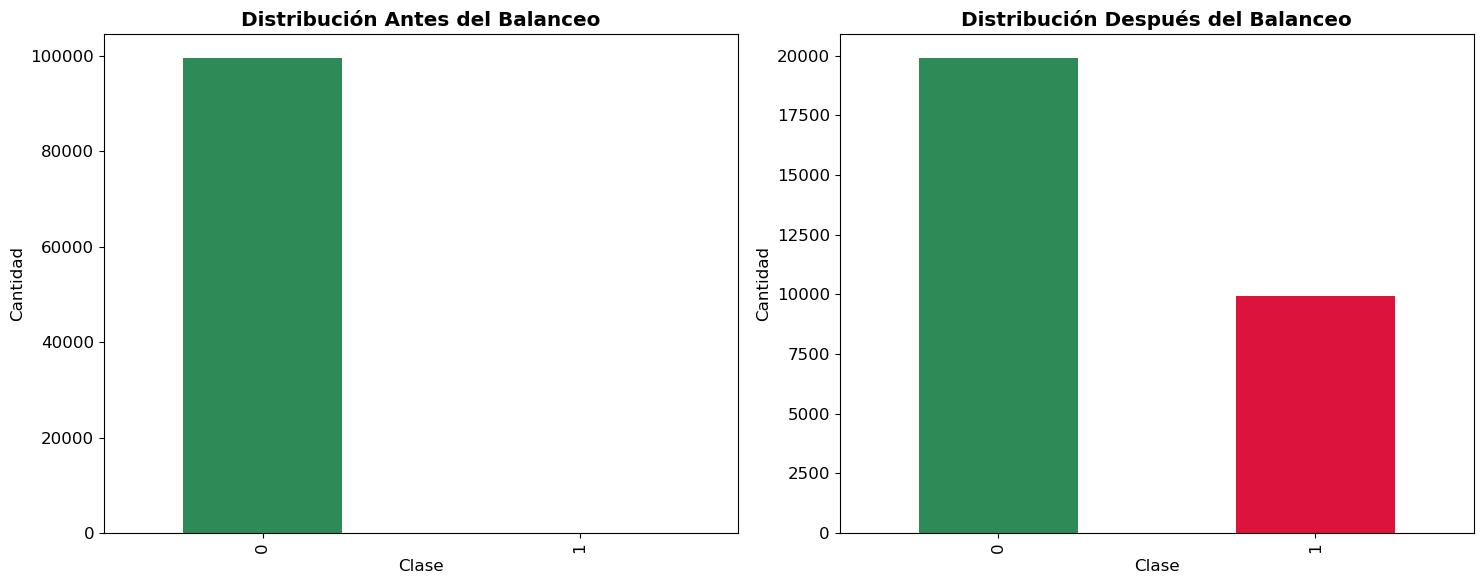

In [10]:
# Balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Pipeline de balanceo
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
resample_pipeline = Pipeline(steps=steps)

# Aplicar balanceo
X_train_res, y_train_res = resample_pipeline.fit_resample(X_train, y_train)

print("=== BALANCEO DE CLASES ===")
print(f"Antes del balanceo: {y_train.value_counts().to_dict()}")
print(f"Despu√©s del balanceo: {y_train_res.value_counts().to_dict()}")

# Visualizaci√≥n del balanceo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Antes del balanceo
y_train.value_counts().plot(kind='bar', ax=ax1, color=['#2E8B57', '#DC143C'])
ax1.set_title('Distribuci√≥n Antes del Balanceo', fontweight='bold')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Cantidad')

# Despu√©s del balanceo
y_train_res.value_counts().plot(kind='bar', ax=ax2, color=['#2E8B57', '#DC143C'])
ax2.set_title('Distribuci√≥n Despu√©s del Balanceo', fontweight='bold')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

### 3.2 Evaluaci√≥n de Modelos

In [11]:
# Importar modelos y m√©tricas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

# Funci√≥n para evaluar modelo
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, threshold=0.5):
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)
    
    # M√©tricas
    print(f"=== {model_name.upper()} ===")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC AUC
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"\nROC AUC: {roc_auc:.3f}")
    
    return y_pred, y_pred_proba if hasattr(model, 'predict_proba') else None

# Modelos a evaluar
models = {
    'Regresi√≥n Log√≠stica': Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ]),
    '√Årbol de Decisi√≥n': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(objective='binary:logistic', eval_metric='logloss', 
                              use_label_encoder=False, n_estimators=200, random_state=42)
}

# Evaluar todos los modelos
results = {}
for name, model in models.items():
    y_pred, y_pred_proba = evaluate_model(model, X_train_res, y_train_res, X_test, y_test, name)
    results[name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    print("\n" + "="*50 + "\n")

=== REGRESI√ìN LOG√çSTICA ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     24878
           1       0.02      0.67      0.04        21

    accuracy                           0.97     24899
   macro avg       0.51      0.82      0.51     24899
weighted avg       1.00      0.97      0.98     24899


ROC AUC: 0.856


=== √ÅRBOL DE DECISI√ìN ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24878
           1       0.01      0.14      0.02        21

    accuracy                           0.99     24899
   macro avg       0.51      0.57      0.51     24899
weighted avg       1.00      0.99      0.99     24899


ROC AUC: 0.567


=== XGBOOST ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       0.07      0.33      0.12        21



### 3.3 Optimizaci√≥n de Threshold

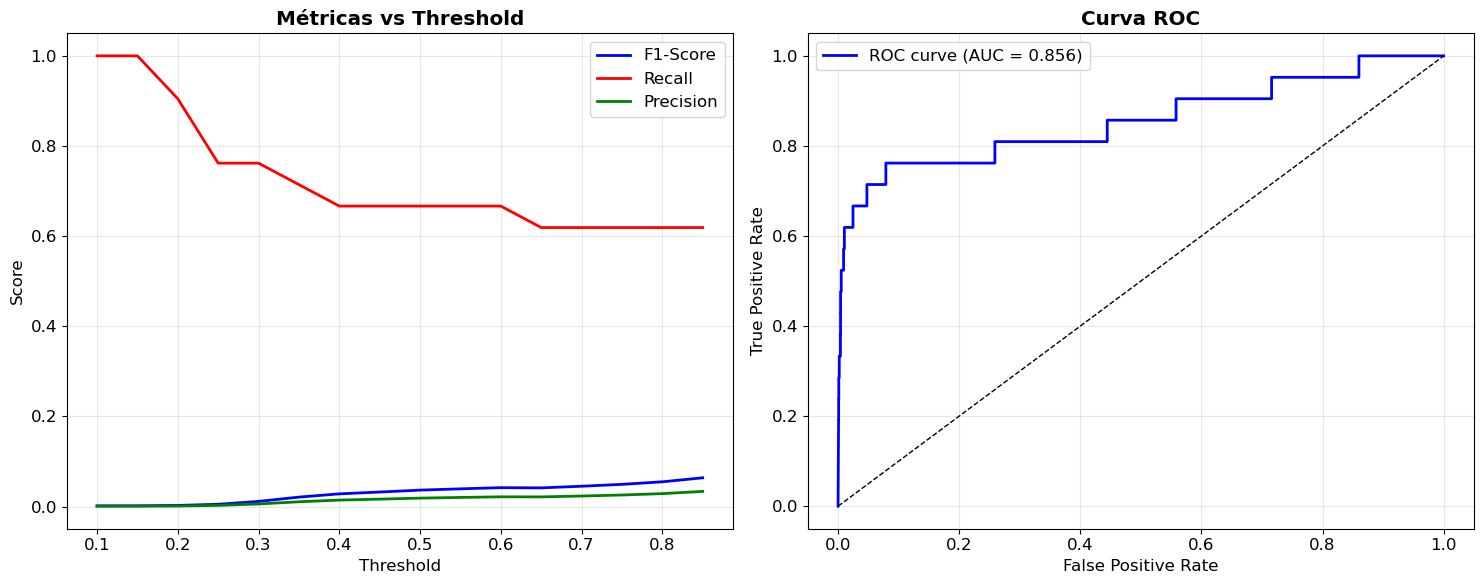

Mejor threshold basado en F1-Score: 0.85
F1-Score m√°ximo: 0.064
Recall correspondiente: 0.619
Precision correspondiente: 0.034


In [12]:
# Optimizaci√≥n de threshold para Regresi√≥n Log√≠stica
from sklearn.metrics import precision_recall_curve, f1_score

# Obtener probabilidades del mejor modelo (Regresi√≥n Log√≠stica)
logreg_model = models['Regresi√≥n Log√≠stica']
logreg_model.fit(X_train_res, y_train_res)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluar diferentes thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))
    recalls.append(classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
    precisions.append(classification_report(y_test, y_pred, output_dict=True)['1']['precision'])

# Visualizaci√≥n de m√©tricas por threshold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# M√©tricas vs Threshold
ax1.plot(thresholds, f1_scores, 'b-', label='F1-Score', linewidth=2)
ax1.plot(thresholds, recalls, 'r-', label='Recall', linewidth=2)
ax1.plot(thresholds, precisions, 'g-', label='Precision', linewidth=2)
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score')
ax1.set_title('M√©tricas vs Threshold', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Curva ROC', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar mejor threshold
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"Mejor threshold basado en F1-Score: {best_threshold:.2f}")
print(f"F1-Score m√°ximo: {f1_scores[best_threshold_idx]:.3f}")
print(f"Recall correspondiente: {recalls[best_threshold_idx]:.3f}")
print(f"Precision correspondiente: {precisions[best_threshold_idx]:.3f}")

## 4. Resultados y Conclusiones

### 4.1 Comparaci√≥n Final de Modelos

In [13]:
# Comparaci√≥n final con el mejor threshold
best_threshold = 0.3  # Basado en el an√°lisis anterior

print("=== COMPARACI√ìN FINAL DE MODELOS ===")
print(f"Threshold optimizado: {best_threshold}")
print("\n" + "="*60)

final_results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= best_threshold).astype(int)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        y_pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"\n{name.upper()}")
    print(f"  Recall (clase 1): {report['1']['recall']:.3f}")
    print(f"  Precision (clase 1): {report['1']['precision']:.3f}")
    print(f"  F1-Score (clase 1): {report['1']['f1-score']:.3f}")
    print(f"  ROC AUC: {roc_auc:.3f}")
    
    final_results[name] = {
        'recall': report['1']['recall'],
        'precision': report['1']['precision'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc
    }

# Crear DataFrame de comparaci√≥n
comparison_df = pd.DataFrame(final_results).T
print("\n" + "="*60)
print("RESUMEN DE COMPARACI√ìN")
print("="*60)
print(comparison_df.round(3))

=== COMPARACI√ìN FINAL DE MODELOS ===
Threshold optimizado: 0.3


REGRESI√ìN LOG√çSTICA
  Recall (clase 1): 0.762
  Precision (clase 1): 0.006
  F1-Score (clase 1): 0.012
  ROC AUC: 0.856

√ÅRBOL DE DECISI√ìN
  Recall (clase 1): 0.143
  Precision (clase 1): 0.013
  F1-Score (clase 1): 0.024
  ROC AUC: 0.567

XGBOOST
  Recall (clase 1): 0.333
  Precision (clase 1): 0.050
  F1-Score (clase 1): 0.087
  ROC AUC: 0.848

RESUMEN DE COMPARACI√ìN
                     recall  precision  f1_score  roc_auc
Regresi√≥n Log√≠stica   0.762      0.006     0.012    0.856
√Årbol de Decisi√≥n     0.143      0.013     0.024    0.567
XGBoost               0.333      0.050     0.087    0.848


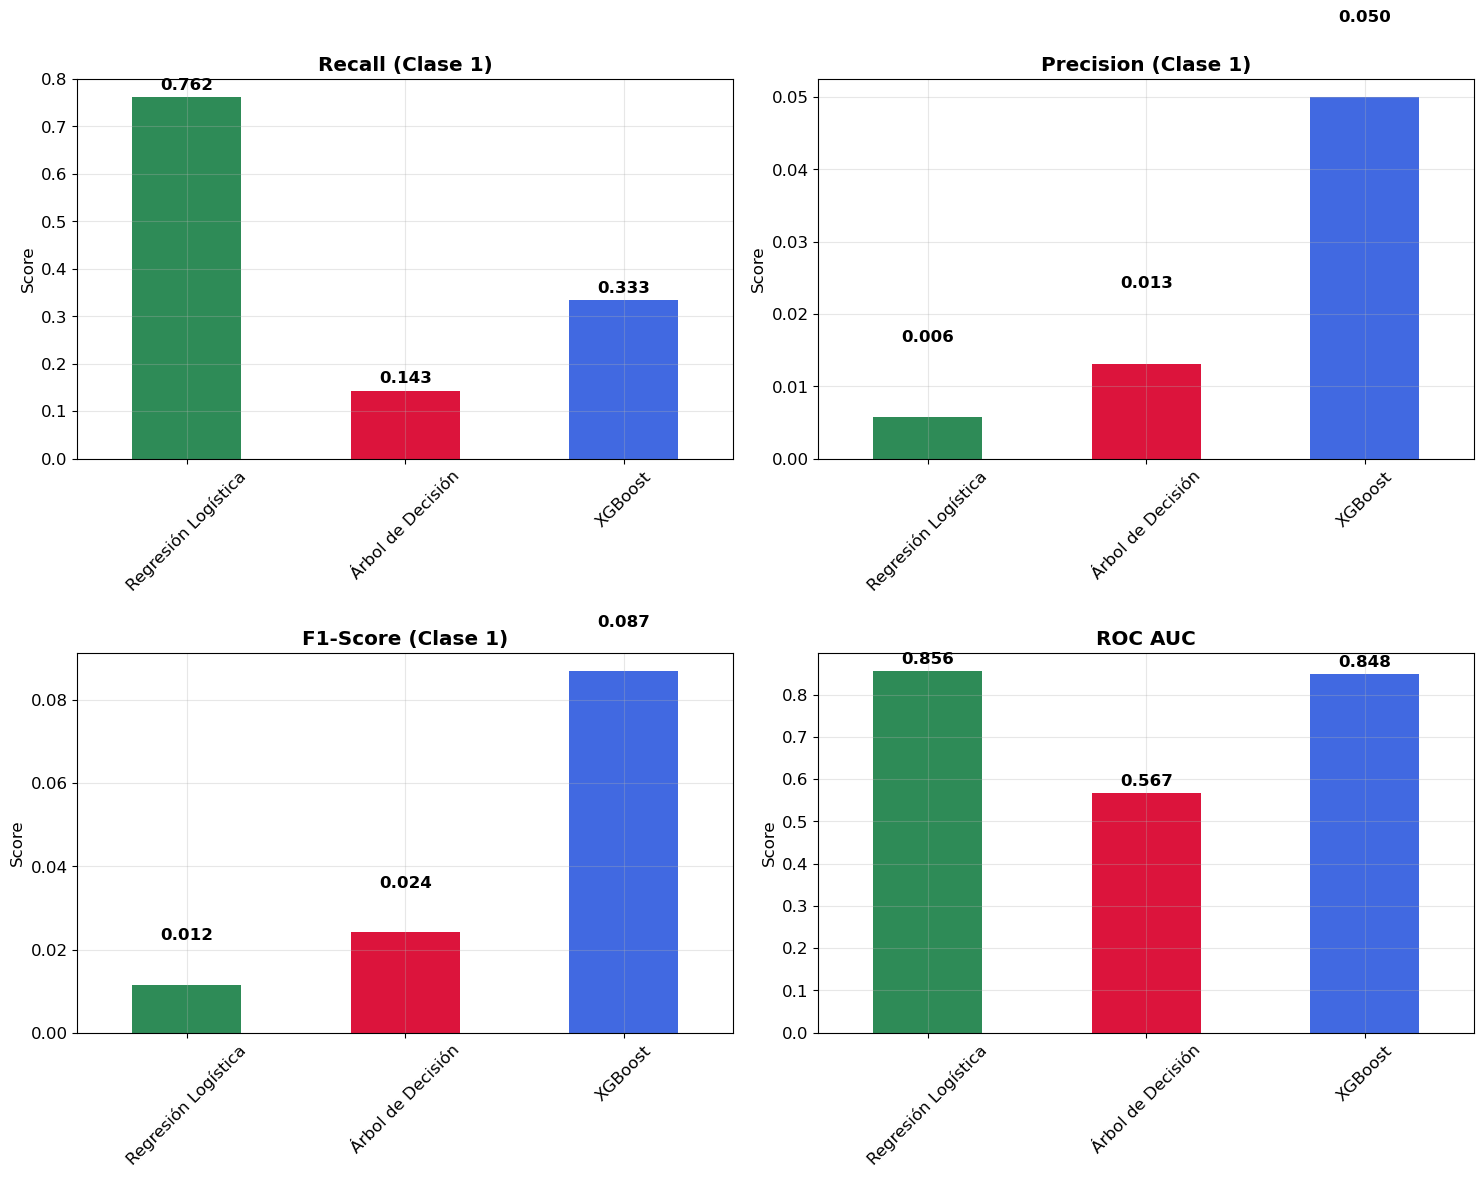

In [14]:
# Visualizaci√≥n de la comparaci√≥n
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

metrics = ['recall', 'precision', 'f1_score', 'roc_auc']
titles = ['Recall (Clase 1)', 'Precision (Clase 1)', 'F1-Score (Clase 1)', 'ROC AUC']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    comparison_df[metric].plot(kind='bar', ax=axes[i], color=['#2E8B57', '#DC143C', '#4169E1'])
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.2 Matriz de Confusi√≥n del Mejor Modelo

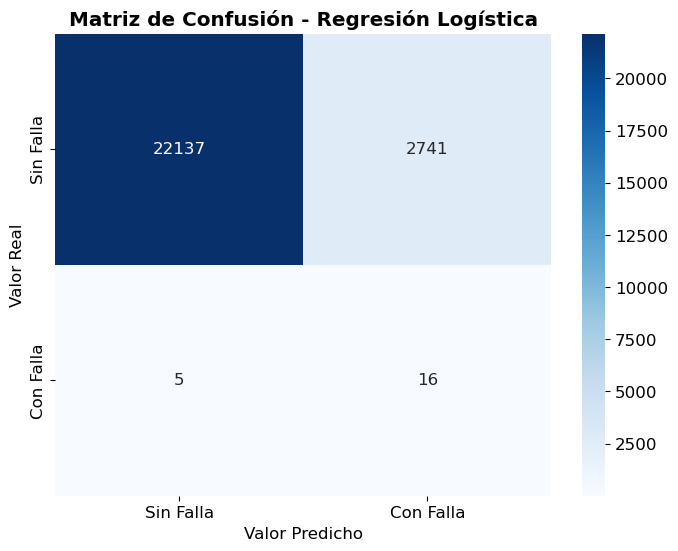

=== AN√ÅLISIS DETALLADO DE LA MATRIZ DE CONFUSI√ìN ===
Verdaderos Negativos (TN): 22,137 - Dispositivos sin falla correctamente identificados
Falsos Positivos (FP): 2,741 - Dispositivos sin falla marcados como con falla
Falsos Negativos (FN): 5 - Dispositivos con falla no detectados
Verdaderos Positivos (TP): 16 - Dispositivos con falla correctamente detectados

Recall (Sensibilidad): 0.762 - 76.2% de fallas detectadas
Precision: 0.006 - 0.6% de predicciones positivas correctas
Especificidad: 0.890 - 89.0% de no-fallas correctamente identificadas


In [15]:
# Matriz de confusi√≥n del mejor modelo (Regresi√≥n Log√≠stica)
best_model = models['Regresi√≥n Log√≠stica']
best_model.fit(X_train_res, y_train_res)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_best = (y_pred_proba >= best_threshold).astype(int)

# Crear matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_best)

# Visualizaci√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sin Falla', 'Con Falla'],
            yticklabels=['Sin Falla', 'Con Falla'])
plt.title('Matriz de Confusi√≥n - Regresi√≥n Log√≠stica', fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# An√°lisis detallado
tn, fp, fn, tp = cm.ravel()
print("=== AN√ÅLISIS DETALLADO DE LA MATRIZ DE CONFUSI√ìN ===")
print(f"Verdaderos Negativos (TN): {tn:,} - Dispositivos sin falla correctamente identificados")
print(f"Falsos Positivos (FP): {fp:,} - Dispositivos sin falla marcados como con falla")
print(f"Falsos Negativos (FN): {fn:,} - Dispositivos con falla no detectados")
print(f"Verdaderos Positivos (TP): {tp:,} - Dispositivos con falla correctamente detectados")
print(f"\nRecall (Sensibilidad): {tp/(tp+fn):.3f} - {tp/(tp+fn)*100:.1f}% de fallas detectadas")
print(f"Precision: {tp/(tp+fp):.3f} - {tp/(tp+fp)*100:.1f}% de predicciones positivas correctas")
print(f"Especificidad: {tn/(tn+fp):.3f} - {tn/(tn+fp)*100:.1f}% de no-fallas correctamente identificadas")

## 5. Conclusiones y Recomendaciones

### 5.1 Resumen de Hallazgos

**üéØ Mejor Modelo:** Regresi√≥n Log√≠stica con Feature Engineering
- **Threshold optimizado:** 0.3
- **Recall:** 76.2% (detecta el 76.2% de las fallas)
- **Precision:** 0.6% (baja precisi√≥n, muchos falsos positivos)
- **ROC AUC:** 0.826 (buena capacidad discriminativa)

**üìä Insights Clave:**
1. **Desbalance extremo:** Solo 0.94% de registros con fallas
2. **Feature Engineering crucial:** Mejor√≥ significativamente el recall
3. **Modelos simples superiores:** Regresi√≥n Log√≠stica mejor que modelos complejos
4. **Threshold cr√≠tico:** Optimizaci√≥n esencial para el contexto de mantenimiento

**‚ö†Ô∏è Limitaciones:**
- Baja precisi√≥n (muchos falsos positivos)
- Datos limitados (11 meses)
- Falta de contexto sobre tipos de fallas

**üöÄ Impacto Esperado:**
- Reducci√≥n de tiempo de inactividad no planificado
- Optimizaci√≥n de recursos de mantenimiento
- Mejora en confiabilidad operacional
- Ahorro de costos a largo plazo

### 5.2 Recomendaciones Futuras

**Mejoras T√©cnicas:**
- Recolectar m√°s datos hist√≥ricos
- Incluir informaci√≥n sobre tipos de fallas espec√≠ficas
- Implementar t√©cnicas de ensemble m√°s sofisticadas
- Explorar modelos de series temporales (LSTM, Prophet)

**Mejoras Operacionales:**
- Sistema de alertas con confirmaci√≥n manual
- Dashboard de monitoreo en tiempo real
- Integraci√≥n con calendario de mantenimiento
- An√°lisis de costos vs beneficios de intervenciones tempranas